In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from scipy.stats import linregress

In [3]:
dog_rates = pd.read_csv('dog_rates_tweets.csv')

In [4]:
rating_pattern = r'(\d+(\.\d+)?)/10'

In [5]:
dog_rates['rating'] = dog_rates['text'].str.extract(rating_pattern)[0]

In [6]:
dog_rates['rating'] = pd.to_numeric(dog_rates['rating'], errors='coerce')

In [7]:
dog_rates = dog_rates[dog_rates.text.str.contains(r'(\d+(.\d+)?)/10')]

/tmp/ipykernel_5002/358304999.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dog_rates = dog_rates[dog_rates.text.str.contains(r'(\d+(.\d+)?)/10')]


In [8]:
dog_rates = dog_rates[dog_rates['rating'] <= 25]


In [9]:
dog_rates['created_at'] = pd.to_datetime(dog_rates['created_at'])


In [10]:
def to_timestamp(dt):
    return dt.timestamp()

In [11]:
dog_rates['timestamp'] = dog_rates['created_at'].apply(to_timestamp)

In [12]:
fit = scipy.stats.linregress(dog_rates['timestamp'], dog_rates['rating'])

In [13]:
fit.slope, fit.intercept

(2.298303175224457e-08, -22.445058882763476)

In [14]:
dog_rates['prediction'] = fit.slope * dog_rates['timestamp'] + fit.intercept

In [15]:
print(dog_rates['prediction'])

2        12.624973
7        12.622373
8        12.620951
24       12.613109
30       12.610619
           ...    
11631    13.183014
11638    13.180420
11665    13.168949
11666    13.168949
11672    13.167190
Name: prediction, Length: 1871, dtype: float64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


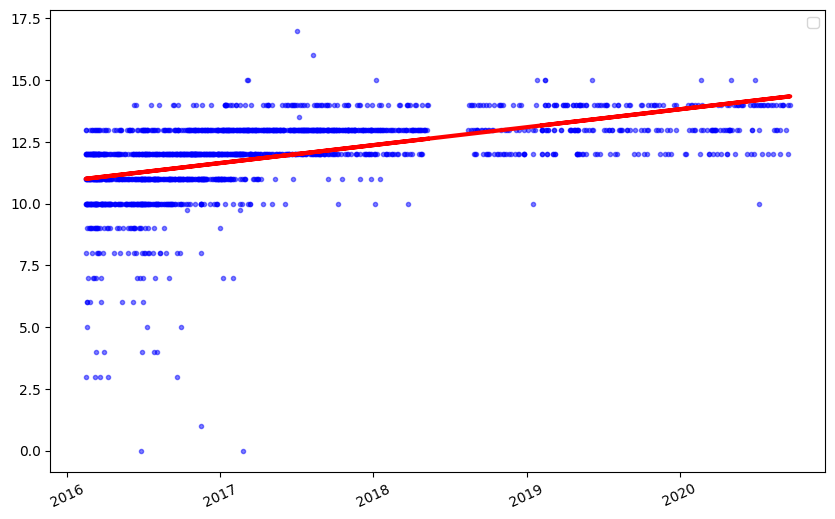

In [16]:
plt.figure(figsize=(10, 6))

# Scatter plot of date vs rating
plt.plot(dog_rates['created_at'], dog_rates['rating'], 'b.', alpha=0.5)

# Fit a line using linear regression (assuming you have the required library imported)

fit = scipy.stats.linregress(dog_rates['created_at'].astype(int), dog_rates['rating'])
plt.plot(dog_rates['created_at'], dog_rates['created_at'].astype(int) * fit.slope + fit.intercept, 'r-', linewidth=3)



plt.xticks(rotation=25)
plt.legend()
plt.show()


In [17]:
dog_rates['residuals'] = dog_rates['rating'] - dog_rates['prediction']

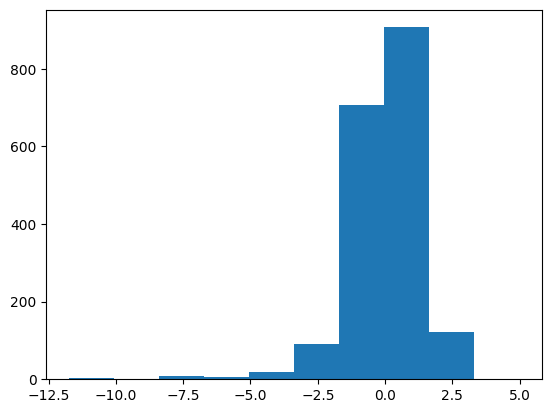

In [18]:
plt.hist(dog_rates['residuals'])
plt.show()

In [19]:
fit.pvalue

3.793798773105867e-121